In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import confusion_matrix

In [14]:
users = pd.read_pickle('users.pkl')

In [15]:
# Eliminar columnas no utilizables
users = users[['Cat', 'default_profile', 'description', 'geo_enabled', 'lang', 'listed_count', 'location', 'name', 'profile_background_color', 'profile_background_image_url', 'profile_background_image_url_https', 'profile_background_tile', 'profile_banner_url', 'profile_image_url', 'profile_image_url_https', 'profile_link_color', 'profile_sidebar_border_color', 'profile_sidebar_fill_color', 'profile_text_color', 'profile_use_background_image', 'screen_name', 'url','favs_tiempo','followers_tiempo', 'statuses_tiempo','friends_tiempo']]

In [16]:
# Generar eje X de features y Normalizarlo
X = users.drop(columns='Cat')
X = preprocessing.scale(X, axis = 0)

In [17]:
# Generar eje Y de targets y encodear las etiquetas
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y =  le.fit_transform(users['Cat'])
y

array([1, 1, 1, ..., 0, 0, 0])

In [18]:
# Crear loop para probar n neighbors 
scores_para_df = []
for i in range(1,10,1):  # de 1 a 10 Kn con steps de 1
    # En cada iteración instanciamos el modelo con un hiperparámetro distinto
    model = KNeighborsClassifier(n_neighbors=i)
    # cross_val_scores nos devuelve un array de 5 resultados, uno por cada partición que hizo automáticamente CV  
    cv_scores = cross_val_score(model, X, y, cv=5)
    # Para cada valor de n_neighbours, creo un diccionario con el valor de n_neighbours y la media y el desvío de los scores.
    dict_row_score = {'score_medio':np.mean(cv_scores),'score_std':np.std(cv_scores),'n_neighbours':i}
    # Guardo cada uno en la lista de diccionarios
    scores_para_df.append(dict_row_score)

In [19]:
# Creamos el DataFrame a partir de la lista de diccionarios
df_scores = pd.DataFrame(scores_para_df)
df_scores.head()

,n_neighbours,score_medio,score_std
0,1,0.963455,0.025172
1,2,0.969293,0.027011
2,3,0.966957,0.027223
3,4,0.963285,0.027801
4,5,0.963618,0.028555


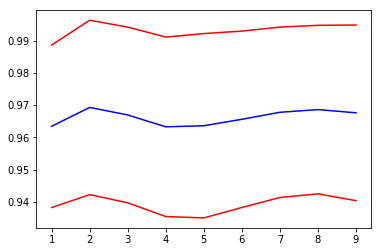

In [20]:
# Graficar scores medios y limites
df_scores['limite_inferior'] = df_scores['score_medio'] - df_scores['score_std']
df_scores['limite_superior'] = df_scores['score_medio'] + df_scores['score_std']

plt.plot(df_scores['n_neighbours'],df_scores['limite_inferior'],color='r')
plt.plot(df_scores['n_neighbours'],df_scores['score_medio'],color='b')
plt.plot(df_scores['n_neighbours'],df_scores['limite_superior'],color='r');

In [21]:
# Separar entre train y test
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [22]:
# Asignar valor optimo de neighbors y ajustar modelo a train
model = KNeighborsClassifier(n_neighbors=2)
model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [23]:
# Predecir valores de test
y_pred = model.predict(X_test)

In [24]:
# Calculamos el accuracy general del modelo
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.971314209472982

In [25]:
# Matriz de confusión
confusion_matrix(y_test, y_pred)

array([[248,   5,   0,   4],
       [ 10, 226,   1,   0],
       [  4,   1, 868,   0],
       [ 13,   4,   1, 114]])

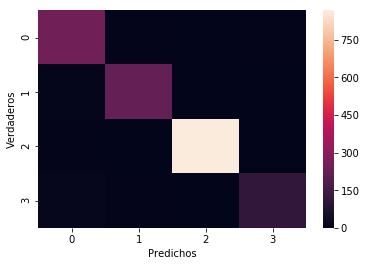

In [26]:
# Heatmap
sns.heatmap(confusion_matrix(y_test, y_pred))
plt.ylabel('Verdaderos')
plt.xlabel('Predichos');